In [2]:
import sys

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense

In [10]:
origin = read_excel('../../cars.xlsx')
origin.head()


,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## 03. 데이터 전처리
### 결측치 확인

In [11]:
origin.isna().sum()

speed    0
dist     0
dtype: int64

## 04. 탐색적 데이터 분석
### 기본통계 확인

In [12]:
origin.describe()


,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


### 산점도 그래프와 추세선 확인


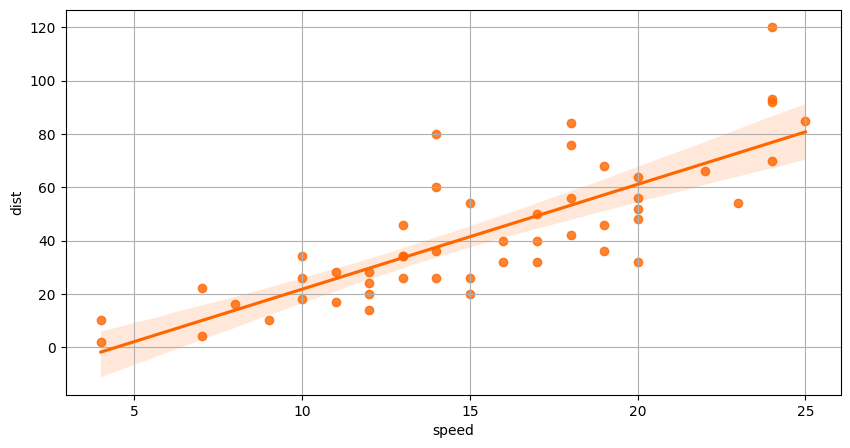

In [13]:
plt.figure(figsize=(10, 5))
sb.regplot(data=origin, x='speed', y='dist', color='#ff6600')
plt.grid()
plt.show()
plt.close()

>곡선보다는 선형 분포에 더 가까우므로 단순선형회귀모델을 적용하기로 함



## 05. 데이터셋 분할하기
### 1. 랜덤시드 고정

In [14]:
np.random.seed(777)

### 2. 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [15]:
x = origin.drop(['dist'], axis=1)
y = origin['dist']
print("훈련데이터 크기:", x.shape, "/ 레이블 크기:", y.shape)

훈련데이터 크기: (50, 1) / 레이블 크기: (50,)


### 3. 훈련 데이터와 검증 데이터로 분할

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 35, 검증용 데이터셋 크기: 15


## 06. 모델 개발
### 1. 모델 정의


In [17]:
model = Sequential()
# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(32, activation = 'relu', input_shape = (1, )))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [18]:
result = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

# 학습결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/300
2/2 [==============================] - 1s 311ms/step - loss: 2972.1770 - mae: 47.1100 - val_loss: 2076.2041 - val_mae: 40.0051
Epoch 2/300
2/2 [==============================] - 0s 37ms/step - loss: 2942.1875 - mae: 46.8351 - val_loss: 2054.1729 - val_mae: 39.7600
Epoch 3/300
2/2 [==============================] - 0s 38ms/step - loss: 2912.0276 - mae: 46.5592 - val_loss: 2032.1241 - val_mae: 39.5133
Epoch 4/300
2/2 [==============================] - 0s 43ms/step - loss: 2883.3518 - mae: 46.2875 - val_loss: 2010.5776 - val_mae: 39.2707
Epoch 5/300
2/2 [==============================] - 0s 34ms/step - loss: 2854.5476 - mae: 46.0173 - val_loss: 1989.9562 - val_mae: 39.0371
Epoch 6/300
2/2 [==============================] - 0s 28ms/step - loss: 2825.3718 - mae: 45.7534 - val_loss: 1969.4420 - val_mae: 38.8033
Epoch 7/300
2/2 [==============================] - 0s 31ms/step - loss: 2798.8418 - mae: 45.4942 - val_loss: 1948.8866 - val_mae: 38.5677
Epoch 8/300
2/2 [================

,loss,mae,val_loss,val_mae
epochs,,,,
1,2972.177002,47.109978,2076.204102,40.005104
2,2942.187500,46.835087,2054.172852,39.760029
3,2912.027588,46.559181,2032.124146,39.513279
4,2883.351807,46.287506,2010.577637,39.270668
5,2854.547607,46.017288,1989.956177,39.037067
...,...,...,...,...
296,272.900421,13.060034,252.241974,13.161634
297,272.888184,13.060447,252.344574,13.168669
298,272.808807,13.062268,252.725800,13.194229


## 7) 학습 결과 평가
### 1. 학습 결과 시각화

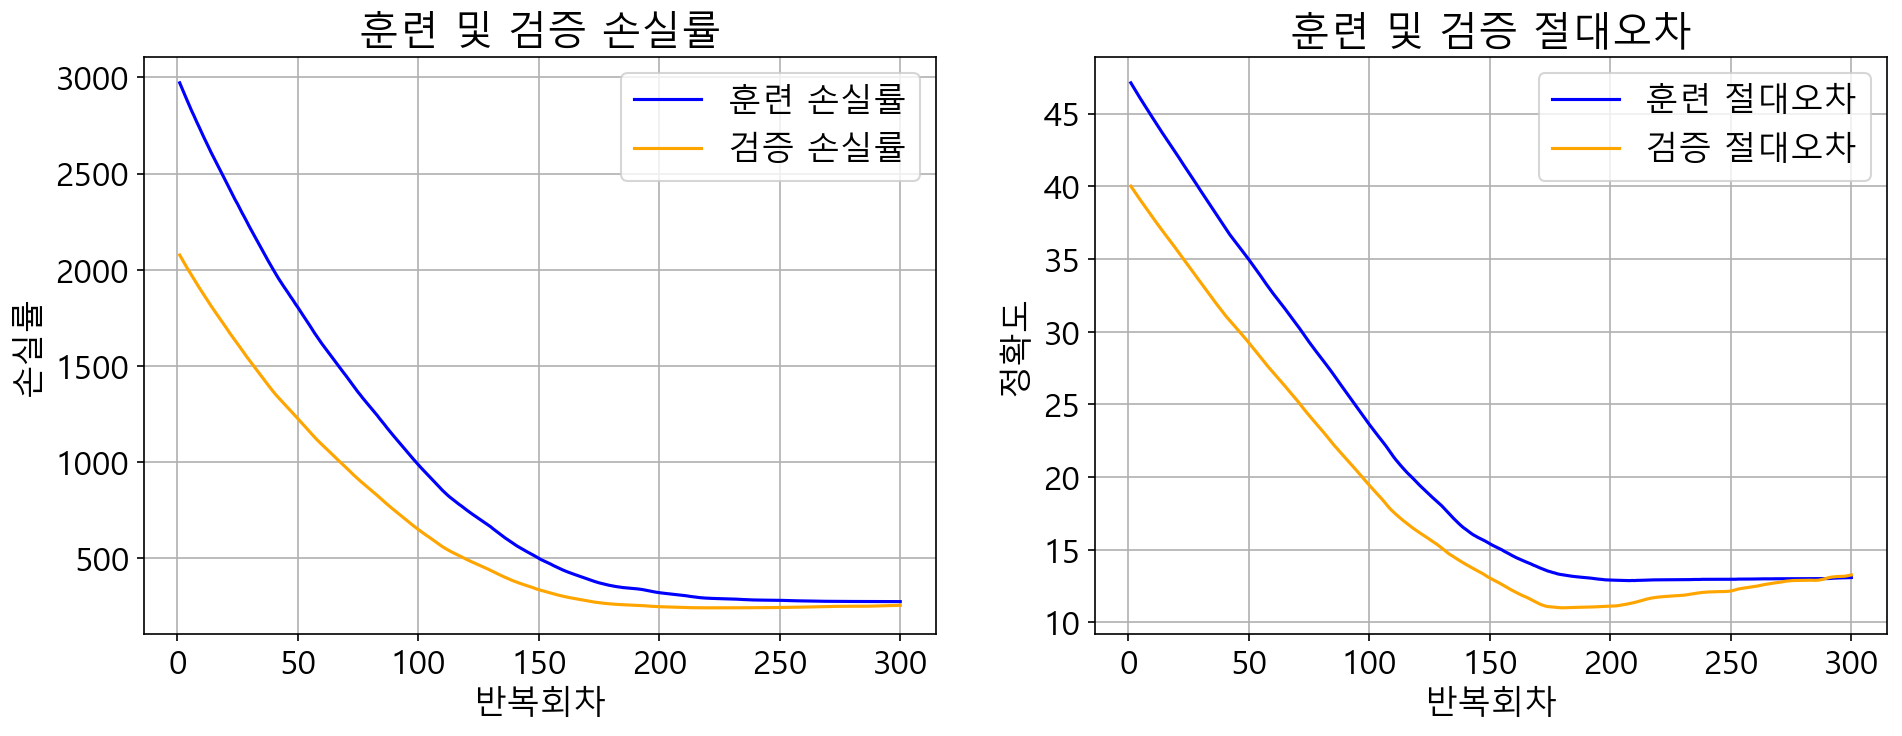

In [19]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()


### 2. 모델 성능 평가


In [20]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 4ms/step - loss: 272.8810 - mae: 13.1001
최종 훈련 손실률: 272.880951, 최종 훈련 절대오차: 13.100104
1/1 [==============================] - 0s 23ms/step - loss: 253.7806 - mae: 13.2629
최종 검증 손실률: 253.780609, 최종 검증 절대오차: 13.262889


## 08. 학습 결과 적용
### 1. 테스트 데이터에 대한 예측 결과 산정

In [21]:
results = model.predict(x_test)
print(results)

1/1 [==============================] - 0s 69ms/step
[[67.80171 ]
 [39.110878]
 [36.241795]
 [33.37271 ]
 [56.325386]
 [41.979965]
 [41.979965]
 [53.4563  ]
 [36.241795]
 [56.325386]
 [41.979965]
 [59.19447 ]
 [21.896374]
 [39.110878]
 [13.289124]]


### 2. 결과 데이터 셋 구성

In [24]:
kdf = DataFrame({
    '검증데이터' : x_test['speed'],
    '실제값' : y_test,
    '예측값' : results.flatten()
})

kdf['예측오차'] = kdf['실제값']-kdf['예측값']
kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,67.801712,-13.801712
17,13,34,39.110878,-5.110878
11,12,14,36.241795,-22.241795
9,11,17,33.372711,-16.372711
36,19,46,56.325386,-10.325386
21,14,60,41.979965,18.020035
22,14,80,41.979965,38.020035
31,18,42,53.456299,-11.456299
12,12,20,36.241795,-16.241795
37,19,68,56.325386,11.674614


### 3. 실제 결과값과 머신러닝에 의한 예측값 비교

In [45]:
x= kdf['검증데이터']
y =kdf['실제값']
y_pred = kdf['예측값']
coeff = np.polyfit(x,y,2)
minx= x.min()
maxx= x.max()
Vtrend = np.linspace(minx,maxx,100)
Ttrend = coeff[-1]
for i in range(0, 2):
    Ttrend += coeff[i] * Vtrend ** (2 - i)
coeff_pred = np.polyfit(x,y_pred,2)
Ttrend_pred = coeff_pred[-1]
for i in range(0,2):
    Ttrend_pred += coeff_pred[i]*Vtrend**(2-i)

Ttrend 계산: 다항식 회귀 계수를 기반으로 추세선의 y 좌표값을 계산합니다. 다항식의 항들을 반복하여 계산하며, 각 계수를 해당 차수의 지수와 함께 곱한 뒤 더하여 추세선의 y 좌표를 결정합니다.

반환: 추세선을 나타내는 Vtrend 배열과 해당 x 좌표에 대응하는 추세선의 y 좌표들을 나타내는 Ttrend 배열을 반환합니다.

In [41]:
x

44    23
17    13
11    12
9     11
36    19
21    14
22    14
31    18
12    12
37    19
19    14
41    20
3      7
16    13
0      4
Name: 검증데이터, dtype: int64

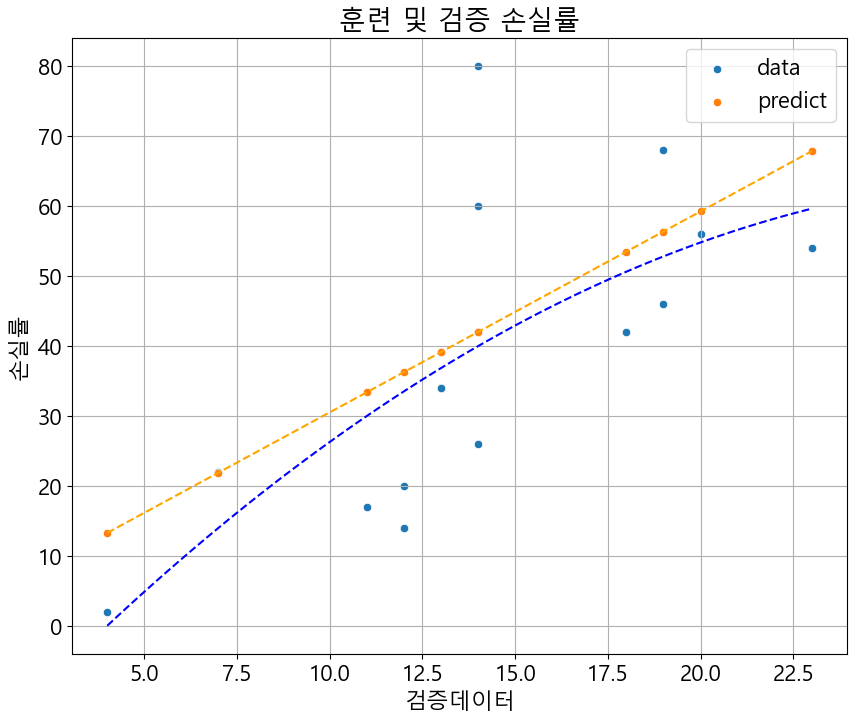

In [57]:
plt.figure(figsize=(10,8))
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False
sb.scatterplot(x=x,y=y,label='data')
sb.scatterplot(x=x, y=y_pred, label='predict')
sb.lineplot(x = Vtrend, y = Ttrend, linestyle = '--', color='blue')
sb.lineplot(x = Vtrend, y = Ttrend_pred, linestyle = '--', color='orange')
plt.title('훈련 및 검증 손실률')
plt.xlabel('검증데이터')
plt.ylabel('손실률')
plt.legend()
plt.grid()
plt.show()